In [ ]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit - Yannis Laaroussi - Fabio Palmisano - Vincent Roh - Alexi Semiz -*-
# -*- date : 2023-11-15 -*-
# -*- Last revision: 2023-11-15 -*-
# -*- python version : 3.9.13 -*-
# -*- Description: Main Containing all the meaningfull results -*-

In [2]:
#import libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from copy import deepcopy
from statsmodels.stats import diagnostic
from datetime import datetime
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [8]:
#import functions
from read.read_functions import read_txt
from read.pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat
from create_all_beers import *

#import cleaning functions
from cleaning_functions.matched_beer import *
from cleaning_functions.rate_beer import *
from cleaning_functions.advocate import *

#import functions for the analysis
from compute_experts import *

#import functions for text analysis
from textual_analysis import*
from visualization import *

---
# Download and save datas
### Data paths

In [ ]:
#Data paths for raw files
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'
rate_beer_ratings = rate_beer_path + 'ratings.txt'
rate_beer_reviews = rate_beer_path + 'reviews.txt'

contries_path = '../datas/countries/countries.csv'


In [ ]:
#data paths for pickle files
beer_advocate_path_pickle = '../datas/BeerAdvocate/pickles/df_advocate_'
matched_beer_data_path_pickle = '../datas/matched_beer_data/pickles/df_matched_beer_'
rate_beer_path_pickle = '../datas/RateBeer/pickles/df_rate_beer_'

advocate_beers_path_pickle = beer_advocate_path_pickle + 'beers.pkl'
advovate_breweries_path_pickle = beer_advocate_path_pickle + 'breweries.pkl'
advocate_ratings_path_pickle = beer_advocate_path_pickle + 'ratings.pkl'
advocate_reviews_path_pickle = beer_advocate_path_pickle + 'reviews.pkl'
advocate_users_path_pickle = beer_advocate_path_pickle + 'users.pkl'

matched_beer_beers_pickle = matched_beer_data_path_pickle + 'beers.pkl'
matched_beer_breweries_pickle = matched_beer_data_path_pickle + 'breweries.pkl'
matched_beer_ratings_ba_pickle = matched_beer_data_path_pickle + 'ratings_ba.pkl'
matched_beer_ratings_rb_pickle = matched_beer_data_path_pickle + 'ratings_rb.pkl'
matched_beer_ratings_pickle = matched_beer_data_path_pickle + 'ratings.pkl'
matched_beer_users_approx_pickle = matched_beer_data_path_pickle + 'users_approx.pkl'
matched_beer_users_pickle = matched_beer_data_path_pickle + 'users.csv'

rate_beer_beers_pickle = rate_beer_path_pickle + 'beers.pkl'
rate_beer_breweries_pickle = rate_beer_path_pickle + 'breweries.pkl'
rate_beer_users_pickle = rate_beer_path_pickle + 'users.pkl'
rate_beer_ratings_pickle = rate_beer_path_pickle + 'ratings.pkl'
rate_beer_reviews_pickle = rate_beer_path_pickle + 'reviews.pkl'

In [ ]:
#Define list of datas for each website
datas_matched_beer_names = [
    'df_matched_beer_beers',
    'df_matched_beer_breweries',
    'df_matched_beer_ratings_ba',
    'df_matched_beer_ratings_rb',
    'df_matched_beer_ratings',
    'df_matched_beer_users_approx',
    'df_matched_beer_users'
    ]
datas_advocate_names = [
    'df_advocate_beers',
    'df_advocate_breweries',
    'df_advocate_ratings',
    'df_advocate_reviews',
    'df_advocate_users'
    ]
datas_rate_beer_names = [
    'df_rate_beer_beers',
    'df_rate_beer_breweries',
    'df_rate_beer_users',
    'df_rate_beer_ratings',
    'df_rate_beer_reviews'
    ]

## import datas

### Raw Format
$\color{Red}{\text{Attention}}$ : Run the celluls in this section only if the datasets stored as pickle are not available.

In [ ]:
#import datas from Advovate Beer
df_advocate_beers = pd.read_csv(advocate_beers_path, sep=',')
df_advocate_breweries = pd.read_csv(advovate_breweries_path, sep=',')
df_advocate_ratings = read_txt(advocate_ratings_path)
df_advocate_reviews = read_txt(advocate_reviews_path)
df_advocate_users = pd.read_csv(advocate_users_path, sep=',')

In [ ]:
#import datas from Matched Beer
df_matched_beer_beers = pd.read_csv(matched_beer_beers, sep=',')
df_matched_beer_breweries = pd.read_csv(matched_beer_breweries, sep=',')
df_matched_beer_ratings_ba = read_txt(matched_beer_ratings_ba)
df_matched_beer_ratings_rb = read_txt(matched_beer_ratings_rb)
df_matched_beer_ratings = pd.read_csv(matched_beer_ratings, sep=',')
df_matched_beer_users_approx = pd.read_csv(matched_beer_users_approx)
df_matched_beer_users = pd.read_csv(matched_beer_users)

In [ ]:
#import datas from Rate Beer
df_rate_beer_beers = pd.read_csv(rate_beer_beers, sep=',')
df_rate_beer_breweries = pd.read_csv(rate_beer_breweries, sep=',')
df_rate_beer_users = pd.read_csv(rate_beer_users, sep=',')
df_rate_beer_ratings = read_txt(rate_beer_ratings)
df_rate_beer_reviews = read_txt(rate_beer_reviews)

### Pickle Format

In [ ]:
#import raw data sets
df_matched_beer_beers, df_matched_beer_breweries, df_matched_beer_ratings_ba, df_matched_beer_ratings_rb, df_matched_beer_ratings, df_matched_beer_users_approx, df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_advocate_beers, df_advocate_breweries, df_advocate_ratings, df_advocate_reviews, df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)
df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews = load_datas('RateBeer', datas_rate_beer_names)

## Store dataFrame (Pickle format)
Use this section to store the datasets in pickle (normally done once)

In [ ]:
#define list of datas for each website
datas_rate_beer = [df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews]
datas_matched_beer = [df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users]
datas_advocate_beer = [df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users]

In [ ]:
#Saving datas
save_datas('RateBeer', datas_rate_beer,datas_rate_beer_names)
save_datas('matched_beer_data', datas_matched_beer,datas_matched_beer_names)
save_datas('BeerAdvocate', datas_advocate_beer,datas_advocate_names)

---
# Initial data analysis

## 0. Preprocessing datasets

*  A first merge is performed on user's datasets in order to have a single dataFrame. 
* Another merge is done on beer DataFrame to provide a single dataFrame containing all beers
* A last merge is performed on ratings (for both Advocate and Rate Beer) to obtain a single dataFrame

In [ ]:
mb_users = df_matched_beer_users
users, mb_users_index = clean_mb_users(mb_users)
advocate_users = deepcopy(df_advocate_users)
advocate_users = clean_advocate_users(advocate_users)
rb_users = df_rate_beer_users
rb_users = clean_rb_users(rb_users)

In [ ]:
df_all_users = create_all_users(advocate_users,mb_users,rb_users)

In [ ]:
adv_beers = df_advocate_beers
rb_beers = df_rate_beer_beers
mb_beers = df_matched_beer_beers
adv_beers = clean_advocate_beers(adv_beers)
rb_beers = clean_rb_beers(rb_beers)
mb_beers = clean_mb_beers(mb_beers)

In [ ]:
df_all_beers = create_all_beers(adv_beers,rb_beers,mb_beers)

In [ ]:
ba_ratings = df_advocate_ratings
rb_ratings = df_rate_beer_ratings
ba_ratings = clean_advocate_ratings(ba_ratings,df_all_beers)
rb_ratings = clean_rb_ratings(rb_ratings,df_all_beers)

In [ ]:
df_ratings_stats = create_ratings_stat(ba_ratings,rb_ratings,df_all_users)

In [ ]:
df_adv_reviews = clean_advocate_reviews(df_advocate_reviews)
df_rb_reviews = clean_rb_reviews(df_rate_beer_reviews)

## 1 Diving in the datas

### 1.1 Distribution of the number of ratings per user

In [ ]:
ratings_per_user = pd.DataFrame({'nbr_ratings':df_ratings_stats.groupby('user_id')['user_id'].count()})

In [ ]:
ratings_per_user.describe()

In [ ]:
sns.ecdfplot(ratings_per_user, label="nbr_ratings", complementary=True)
plt.title('Cumulative histogram of the number of ratings per user (all websites)')
plt.xlabel('Number of ratings')
plt.ylabel('Proportion')
plt.semilogx()
plt.show()

The distribution has a heavy tail, indicating that there are numerous users who have posted only a few ratings, and conversely, a small number of users who are prolific raters. This observation motivates us to delve deeper into understanding the distinctions between these prolific raters and the rest of the user population.

#### 1.1.a) Define who is a massive rater 
In order to separate people in two group, a definition of a massive rater, called from now an "expert" has to be found. The choice was made here to consider the number of ratings per year and aggregate scores from the past 3 years with the formula:
$$
S_{Y_j} = 2 * R_{Y_{j}} + 0.5 * R_{Y_{j-1}} + 0.25 * R_{Y_{j-2}} + 0.1 * R_{Y_{j-3}}
$$
, where $R_{Y_j}$ denotes the number of ratings for the year j and $S_{Y_j}$ is the score of the user for the year j.
The experts are then people from the 0.995 quantile of the score calculate previously (among those who have a non-zero score i.e active users).

In [ ]:
#define the expert users
df_ratings_stat_expert, df_ratings_stat_pivot = compute_experts_table(df_ratings_stats)
df_ratings_stat_expert.head()

In [ ]:
# build a dictionary of experts per year
experts_dict = {}
for year in range(1996, 2018):
    experts_dict[year] = df_ratings_stat_expert.loc[(df_ratings_stat_expert["year"] == year) & (df_ratings_stat_expert["is_expert"] == 1)].user_id.values.tolist()

In [ ]:
df_ratings_stats["is_expert"]=df_ratings_stats[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)

In [ ]:
df_expert_per_year = df_ratings_stat_expert.groupby('year').apply(lambda x: sum(x['is_expert']))

In [ ]:
df_expert_per_year.plot(kind='bar', figsize=(15,5))
plt.ylabel('Number of experts')
plt.xlabel('Year')
plt.title('Number of experts per year')
plt.grid(False)
plt.show()

### 1.2. Analysis of the behavior of the two categories
#### 1.2.a) Mean of the ratings

The purpose of this section is to analyze if the experts are more severe than the rest of the population on the global rating (column 'rating' in the DataFrame).

In [ ]:
avg_ratings_expert = []
avg_ratings_normal = []
ttest_expert_normal = []

interest_years = sorted([year for year in df_ratings_stats.year.unique() if year > 2002])

for year in interest_years:
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    avg_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    avg_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    ttest = stats.ttest_ind(df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'], df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'])
    ttest_expert_normal.append(ttest)
    avg_ratings_expert.append(avg_expert)
    avg_ratings_normal.append(avg_normal)

In [ ]:
bar_width = 0.35
fig, ax = plt.subplots()

bar_positions1 = np.arange(len(avg_ratings_expert))
bar_positions2 = bar_positions1 + bar_width

ax.bar(bar_positions1, avg_ratings_normal, width=bar_width, label='Casuals', color='blue', alpha=0.7)
ax.bar(bar_positions2, avg_ratings_expert, width=bar_width, label='Experts', color='red', alpha=0.7)

ax.set_xlabel('Years')
ax.set_ylabel('Average ratings')
ax.set_title('Average of ratings between experts and casuals per year ')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(interest_years, rotation=45, ha='right')

y_min = min(min(avg_ratings_normal), min(avg_ratings_expert)) - 1 
y_max = max(max(avg_ratings_normal), max(avg_ratings_expert)) + 1 
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

From this graph it is clear that the expert are more severe, but let's verify with the mean of a T-Test.

In [ ]:
for year in range(len(ttest_expert_normal)):
    if ttest_expert_normal[year][1] < 0.05:
        print(f'The p-value for the year {interest_years[year]} is {ttest_expert_normal[year][1]:.2e}')

The t-test tells that the hypothesis H0, under which the mean for the two groups are equals, can be rejected.

#### 1.2.b) Top 10 rated beers

Now, the assessment focuses on whether experts and the general population share similar preferences when it comes to rating beers. For this investigation, the beers are sorted based on the number of times they were rated. A comparison is then made between the top 10 beers for the two groups.

In [ ]:
df_top_10_experts = pd.DataFrame()
df_top_10_rest = pd.DataFrame()

interest_years = sorted([year for year in df_ratings_stats.year.unique() if year > 2002])

for year in interest_years:
    top_10_rest = []
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    top_10_rest = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)].copy()
    top_10_rest = top_10_rest.groupby('beer_id').agg({'rating': 'count', 'beer_name': 'first'})
    top_10_rest = top_10_rest.sort_values(by='rating', ascending=False).head(10)

    df_top_10_rest[f'{year}'] = top_10_rest['beer_name'].values
    top_10_experts = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)].copy()
    top_10_experts = top_10_experts.groupby('beer_id').agg({'rating': 'count', 'beer_name': 'first'})
    top_10_experts = top_10_experts.sort_values(by='rating', ascending=False).head(10)
    df_top_10_experts[f'{year}'] = top_10_experts['beer_name'].values

In [ ]:
similarity = {}
for col in df_top_10_experts.columns:
    value = df_top_10_experts[col].isin(df_top_10_rest[col]).sum()
    similarity[col] = value

In [ ]:
for key in similarity:
    if similarity[key] > 0:
        print(f'Year {key} has {similarity[key]} beer(s) in common')
        common_beers = df_top_10_experts[df_top_10_experts[key].isin(df_top_10_rest[key])][key].values
        print(common_beers)

#### 1.2.c) We are going to see what kind (in terms of popularity) of beer casuals and expert rate

For each rating, we compute the number of ratings done the previous year on the rated beers. It gives an idea of the popularity of the rated beer.

In [ ]:
df_grouped_beer_year=df_ratings_stats.groupby(["beer_id","year"]).agg("size").reset_index(name="count")

In [ ]:
df_grouped_beer_year_shifted = df_grouped_beer_year.copy()
df_grouped_beer_year_shifted['year'] += 1
df_grouped_beer_year_shifted.rename(columns={"count": "count_last_year"}, inplace=True)
df_ratings_stats = df_ratings_stats.merge(df_grouped_beer_year_shifted, how='left', on=['beer_id', 'year'])
df_ratings_stats.fillna({"count_last_year":0}, inplace=True)



Let's analyse ratings of year 2016

In [ ]:
df_ratings_this_year,experts_this_year=filter_year_and_add_is_expert(df_ratings_stats,2016,df_ratings_stat_expert)

In [ ]:
nbr_ratings_year_minus1_experts=df_ratings_this_year.loc[df_ratings_this_year["is_expert"]==1]["count_last_year"]
nbr_ratings_year_minus1_non_experts=df_ratings_this_year.loc[df_ratings_this_year["is_expert"]==0]["count_last_year"]


In [ ]:
fig, ax1 = plt.subplots()


color = 'tab:orange'
ax1.set_xlabel('Number of ratings per beer in 2015')
ax1.set_ylabel('Ratings counts in 2016', color=color)
ax1.hist(nbr_ratings_year_minus1_non_experts, bins=100, log=True, alpha=0.5, color="orange", label="Non experts",zorder=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()


color = 'tab:blue'
ax2.set_ylabel('Ratings count in 2016', color=color)
ax2.hist(nbr_ratings_year_minus1_experts, bins=100, log=True, alpha=0.5, color="blue", label="Experts",zorder=1)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)
red_patch = mpatches.Patch(color='orange', label='non experts')
blue_patch = mpatches.Patch(color='blue', label='experts')
ax1.legend(handles=[red_patch, blue_patch])
plt.title("Distribution of number of ratings per beer in 2015 of ratings in 2016")
fig.tight_layout()
plt.show()

We clearly see that experts rate less popular beers, let's perform a ttest to check this assumption

In [ ]:
ttest_ind(nbr_ratings_year_minus1_experts,nbr_ratings_year_minus1_non_experts)

The  ttest confirms the results

What if we group the reults by user and use the mean this time :

In [ ]:
mean_nbr_ratings_years_minus_one_per_user=df_ratings_this_year.groupby(["user_id","is_expert"])["count_last_year"].agg("mean").reset_index().set_index("user_id")

In [ ]:
mean_nbr_ratings_years_minus_one_per_user_experts=mean_nbr_ratings_years_minus_one_per_user.loc[mean_nbr_ratings_years_minus_one_per_user["is_expert"]==1]["count_last_year"]
mean_nbr_ratings_years_minus_one_per_user_non_experts=mean_nbr_ratings_years_minus_one_per_user.loc[mean_nbr_ratings_years_minus_one_per_user["is_expert"]==0]["count_last_year"]

In [ ]:
fig, ax1 = plt.subplots()


color = 'orange'
ax1.set_xlabel('Number of ratings per beer in 2015')
ax1.set_ylabel('Users count in 2016', color=color)
ax1.hist(mean_nbr_ratings_years_minus_one_per_user_non_experts, bins=100, log=True, alpha=0.5, color="orange", label="Non experts")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()


color = 'tab:blue'
ax2.set_ylabel('Users count in 2016', color=color)
ax2.hist(mean_nbr_ratings_years_minus_one_per_user_experts, bins=100, log=True, alpha=1, color=color, label="Experts")
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)
red_patch = mpatches.Patch(color='orange', label='non experts')
blue_patch = mpatches.Patch(color='blue', label='experts')
ax1.legend(handles=[red_patch, blue_patch])
plt.title("Distribution of number of ratings per beer in 2015 of users who rated beers in 2016")
fig.tight_layout()
plt.show()

From this graph, experts are located on the left side of the x-axis, meaning that they rate less popular beer.

In [ ]:
ttest_ind(mean_nbr_ratings_years_minus_one_per_user_experts,mean_nbr_ratings_years_minus_one_per_user_non_experts)

The  ttest confirms the results

### 1.2.d) Analysis on the beers styles rated by experts and casuals

In [ ]:
#Saké have multiple styles, we just want to take one style for every saké
df_ratings_stats['style'] =  df_ratings_stats['style'].str.replace(r'^Saké.*', 'Saké', regex=True)

In [ ]:
#Numbers of ratings per style
ratings_per_style = df_ratings_stats.groupby('style').size().reset_index(name='rating_count')


In [ ]:
#Plot the numbers of rating for the first 16 Beer's Styles with more ratings

sorted_ratings = ratings_per_style.sort_values(by='rating_count', ascending=False)

top_16_styles = sorted_ratings.head(16)
top_16 = top_16_styles['style'].unique()

plt.bar(sorted_ratings['style'].head(16), sorted_ratings['rating_count'].head(16))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Beer Styles')
plt.ylabel('Rating Count')
plt.title('Top 16 Beer Styles by Rating Count')
plt.grid(False)
plt.show()


Now let see the evolution over time

In [ ]:
df_stats_per_year = df_ratings_stats.groupby(['style', 'year']).size().reset_index(name='nb_ratings')


In [ ]:
df_styles_peryear_pivot = df_stats_per_year.pivot(index='style', columns='year', values='nb_ratings')
df_styles_peryear_pivot.fillna(0, inplace=True)

In [ ]:
#This table will show us the number of ratings per year per style for the top16 rated styles (n terms of number of ratings)

df_top_16 = df_styles_peryear_pivot.loc[top_16]
df_top_16

In [ ]:
#Plot the distribution of the top 16 rated Beer's Styles over time

fig, axes = plt.subplots(4,4, figsize = (20,20), sharex = True)
bins_ =10


years_rating = df_ratings_stats['year'].unique()
years_rating = sorted(years_rating)
years_rating

for i in range(0,4):
    for j in range(0,4):
        ax = axes[i,j]
        current_style = top_16[i + 4 * j]
        ax.set_title(current_style) 
        style_ratings = df_top_16.loc[current_style]
        ax.bar(style_ratings.index, style_ratings.values, edgecolor='black')
        ax.grid(False)
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Ratings')

fig.suptitle('Number of Ratings per Year for Top 16 Styles', fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

In [ ]:
#Plot the evolution on time of the number of ratings per style (Plotting Expert and Non Expert evolution)

years_ = [year for year in years_rating if year > 2001]
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True)
for i, year in enumerate(years_):
    
    row = i // n_cols
    col = i % n_cols
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    df_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]
    df_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]
    df_stats_per_year_expert = df_expert.groupby(['style', 'year']).size().reset_index(name='nb_ratings')
    df_stats_per_year_normal = df_normal.groupby(['style', 'year']).size().reset_index(name='nb_ratings')
    df_styles_peryear_pivot_expert = df_stats_per_year_expert.pivot(index='style', columns='year', values='nb_ratings')
    df_styles_peryear_pivot_expert.fillna(0, inplace=True)
    df_styles_peryear_pivot_normal = df_stats_per_year_normal.pivot(index='style', columns='year', values='nb_ratings')
    df_styles_peryear_pivot_normal.fillna(0, inplace=True)
    for column in top_16:
        if column not in df_styles_peryear_pivot_expert.index:
            df_styles_peryear_pivot_expert.loc[column] = 0
            df_styles_peryear_pivot_normal.loc[column] = 0
    df_top_16_expert = df_styles_peryear_pivot_expert.loc[top_16]
    df_top_16_normal = df_styles_peryear_pivot_normal.loc[top_16]
    ax = axes[row, col]
    ax.plot(df_top_16_normal.index, df_top_16_normal.values, label='Non expert', color='orange')
    ax.set_xticks(df_top_16_normal.index,df_top_16_normal.index, rotation=45, ha='right')
    ax.set_xlabel('Beer Styles')
    ax.set_ylabel('Rating Count (Non experts)', color='black')
    ax.tick_params(axis='y', labelcolor='black')
    ax2 = ax.twinx()
    ax2.plot(df_top_16_expert.index, df_top_16_expert.values, label='Expert', color='blue',alpha=0.3)
    ax2.set_ylabel('Rating Count (Expert)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax.set_title(str(year))
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax.grid(False)
    ax2.grid(False)
fig.suptitle('Experts and Non experts Ratings Counts for Top 16 Beer Styles by Year', fontsize=20, y=1.02)
fig.tight_layout()
plt.show()


For the first years we observe that the distribution is similar between the experts and the others. However, the trend changes from year 2010. Since then, experts tend to rate different beers (in terms of style) than non experts. Plus, for certain beers, there are more ratings done by experts than non experts. Let's investigate this last point !

In [ ]:
#This show us the proportion over time of Expert (Blue) and Non Expert (Orange) rating 

fig,ax=plt.subplots(4,4,sharex=True)
fig.set_size_inches(20,20)
n_rows=4
n_cols=4
for i,style in enumerate(top_16):
    df_style=df_ratings_stats.loc[df_ratings_stats["style"]==style].groupby(["year","is_expert"])["rating"].agg("count").reset_index()
    df_style["rating"]=df_style["rating"]/df_style.groupby("year")["rating"].transform("sum")
    df_style.pivot(index="year",columns="is_expert",values="rating").plot(kind="bar",stacked=True,ax=ax[i//n_cols,i%n_cols],color=['orange', 'blue'])

    ax[i//n_cols,i%n_cols].set_title(style)
    ax[i//n_cols,i%n_cols].set_ylabel("Ratings proportion")
    red_patch = mpatches.Patch(color='orange', label='non experts')
    blue_patch = mpatches.Patch(color='blue', label='experts')
    ax[i//n_cols,i%n_cols].legend(handles=[red_patch, blue_patch])
    ax[i//n_cols,i%n_cols].grid(False)
    
fig.suptitle("Rating proportion of experts and non experts for top 16 styles",fontsize=20,y=1.02)
fig.tight_layout()
plt.show()

First of all, even if experts account only for 0.5% of the active they represent a big part in the ratings of the beers. There are even some years and styles for which thew overtake non experts part.

Thus their voice really matter since hey can make a huge difference for the final average rating displayed on websites.

It leads us to wonder if their ratings differentiate

In [ ]:
#Evolution on time of Experts and non Experts Grades Mean over Styles 

fig, axs = plt.subplots(4, 4, figsize=(20, 10), sharex = True, sharey = True)
axs = axs.flatten()


for i, year in enumerate(years_):
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    df_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]
    df_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]
    ratings_per_style_expert = df_expert.groupby('style')['rating'].mean().reset_index(name='rating_mean')
    ratings_per_style_normal = df_normal.groupby('style')['rating'].mean().reset_index(name='rating_mean')
    df_stats_per_year_expert = df_expert.groupby(['style', 'year'])['rating'].mean().reset_index(name='ratings_mean')
    df_stats_per_year_normal = df_normal.groupby(['style', 'year'])['rating'].mean().reset_index(name='ratings_mean')
    df_styles_peryear_pivot_expert = df_stats_per_year_expert.pivot(index='style', columns='year', values='ratings_mean')
    df_styles_peryear_pivot_expert.fillna(0, inplace=True)
    df_styles_peryear_pivot_normal = df_stats_per_year_normal.pivot(index='style', columns='year', values='ratings_mean')
    df_styles_peryear_pivot_normal.fillna(0, inplace=True)
    for column in top_16:
        if column not in df_styles_peryear_pivot_expert.index:
            df_styles_peryear_pivot_expert.loc[column] = 0
            df_styles_peryear_pivot_normal.loc[column] = 0
    df_top_16_expert = df_styles_peryear_pivot_expert.loc[top_16]
    df_top_16_normal = df_styles_peryear_pivot_normal.loc[top_16]

   
    ax = axs[i]

    ax.plot(df_top_16_expert.index, df_top_16_expert.values, label='Expert')
    ax.plot(df_top_16_normal.index, df_top_16_normal.values, label='Normal')
    ax.set_xticks(range(len(top_16)))
    ax.set_xticklabels(top_16, rotation=45, ha='right')
    ax.set_xlabel('Beer Styles')
    ax.set_ylabel('Rating ')
    ax.set_title('Top 16 Styles in Graded Beer Styles in ' + str(year))
    ax.legend()
    ax.grid(False)
fig.suptitle('Experts and Non experts Ratings Means for Top 16 Rated Beer Styles by Year', fontsize=20, y=1.02)

fig.tight_layout()
plt.show()

We observe that experts and non experts have similar behaviour on the most rated beer styles. Hence, we can say that highly-popular beers makers can work regardless of a side-effect of experts.

#### 1.2.e) Now let's analyse how their ratings differentiate

In [ ]:
# Compute the difference of ratings between experts and non experts for each beer (median)
minimum_number_of_ratings=100
YEAR=2017
absolute_difference_ratings=[]

df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_stats,YEAR,df_ratings_stat_expert)
beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values
df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")

for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
    if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
        absolute_difference_ratings.append(np.abs(difference_ratings_medians.loc[beer_id,0]-difference_ratings_medians.loc[beer_id,1]))


In [ ]:
# Plot the distribution of the difference of ratings between experts and non experts for each beer (median)
plt.hist(absolute_difference_ratings,bins=50)
plt.xlabel("Absolute difference in median ratings")
plt.ylabel("Number of beers")
plt.title(f"Distribution of absolute difference in median ratings between experts and non experts \n for beers with more than {minimum_number_of_ratings} ratings in {YEAR}")
plt.show()

In [ ]:
# Compute the difference of ratings between experts and non experts for each beer (mean and median)
fig,ax=plt.subplots(int(np.ceil(len(np.arange(50,500,50))/3)),3,sharex=True)
fig.set_size_inches(20,20)
nb_bins=20

for i,minimum_number_of_ratings in enumerate(np.arange(50,500,50)):
    difference_ratings_medians_list=[]
    difference_ratings_means_list=[]
    beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values
    df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
    difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")
    difference_ratings_means=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("mean")
    
    for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
        if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
            difference_ratings_medians_list.append(difference_ratings_medians.loc[beer_id,1]-difference_ratings_medians.loc[beer_id,0])
            difference_ratings_means_list.append(difference_ratings_means.loc[beer_id,1]-difference_ratings_means.loc[beer_id,0])
    if i==0:
        difference_means_to_test=difference_ratings_means_list.copy()
    ax[i//3,i%3].hist(difference_ratings_medians_list,alpha=0.5,bins=nb_bins,color="b",label="median")
    ax[i//3,i%3].hist(difference_ratings_means_list,alpha=0.5,bins=nb_bins,color="orange",label="mean")
    ax[i//3,i%3].axvline(0,c="r",linestyle="--")
    ax[i//3,i%3].set_xlabel("difference in medians/means ratings (experts-non experts)")
    ax[i//3,i%3].set_ylabel("Number of beers")
    ax[i//3,i%3].set_title("Minimum number of ratings: "+str(minimum_number_of_ratings))
    ax[i//3,i%3].legend()
fig.suptitle("Distribution of difference in median and mean ratings of experts - non experts for different minimum number of ratings of beers",fontsize=15,y=1.02)
fig.tight_layout()
plt.show()

we see that the experts tend to be more severe (negative difference), lets check if this trend holds for all years

In [ ]:
# Compute the distribution of the difference of ratings between experts and non experts over all beers (mean and median) for each year
fig,ax=plt.subplots(4,3,sharex=True)
fig.set_size_inches(20,20)
nb_bins=20
min_number_of_ratings=50

for i,YEAR in enumerate(range(2006,2018)):
  
    difference_ratings_medians_list=[]
    difference_ratings_means_list=[]
    df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_stats,YEAR,df_ratings_stat_expert)
    beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>min_number_of_ratings].index.values
    df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
    difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")
    difference_ratings_means=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("mean")
    
    for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
        if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
            difference_ratings_medians_list.append(difference_ratings_medians.loc[beer_id,1]-difference_ratings_medians.loc[beer_id,0])
            difference_ratings_means_list.append(difference_ratings_means.loc[beer_id,1]-difference_ratings_means.loc[beer_id,0])
            
    ax[i//3,i%3].hist(difference_ratings_medians_list,alpha=0.5,bins=nb_bins,color="b",label="median")
    ax[i//3,i%3].hist(difference_ratings_means_list,alpha=0.5,bins=nb_bins,color="orange",label="mean")
    ax[i//3,i%3].axvline(0,c="r",linestyle="--")
    ax[i//3,i%3].set_xlim(-1.25,1)
    ax[i//3,i%3].set_xlabel("Difference in median ratings (experts-non experts)")
    ax[i//3,i%3].set_ylabel("Number of beers")
    ax[i//3,i%3].set_title("Year: "+str(YEAR))
    ax[i//3,i%3].legend()
fig.suptitle(f"Distribution of difference in median and mean ratings between (experts - non experts) for different years and minimum number of ratings of beers: {min_number_of_ratings}",fontsize=15,y=1.02)
fig.tight_layout()
plt.show()

the trend is not that obvious now, grouping the results by beer show that we cannot say that in average experts are more severe (on beers that have at least 50 ratings)

In [ ]:
# same but with beer that have at least 400 ratings (popular beers)
fig,ax=plt.subplots(4,3,sharex=True)
fig.set_size_inches(20,20)
nb_bins=20
min_number_of_ratings=400

for i,YEAR in enumerate(range(2006,2018)):
    difference_ratings_medians_list=[]
    difference_ratings_means_list=[]
    df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_stats,YEAR,df_ratings_stat_expert)
    beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>min_number_of_ratings].index.values
    df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
    difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")
    difference_ratings_means=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("mean")
    
    for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
        if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
            difference_ratings_medians_list.append(difference_ratings_medians.loc[beer_id,1]-difference_ratings_medians.loc[beer_id,0])
            difference_ratings_means_list.append(difference_ratings_means.loc[beer_id,1]-difference_ratings_means.loc[beer_id,0])
            
    ax[i//3,i%3].hist(difference_ratings_medians_list,alpha=0.5,bins=nb_bins,color="b",label="median")
    ax[i//3,i%3].hist(difference_ratings_means_list,alpha=0.5,bins=nb_bins,color="orange",label="mean")
    ax[i//3,i%3].axvline(0,c="r",linestyle="--")
    ax[i//3,i%3].set_xlim(-1.25,1)
    ax[i//3,i%3].set_xlabel("Difference in median ratings (experts-non experts)")
    ax[i//3,i%3].set_ylabel("Number of beers")
    ax[i//3,i%3].set_title("Year: "+str(YEAR))
    ax[i//3,i%3].legend()
fig.suptitle(f"Distribution of difference in median and mean ratings between (experts - non experts) for different years and minimum number of ratings of beers: {min_number_of_ratings}",fontsize=15,y=1.02)
fig.tight_layout()
plt.show()

With beers that have at least 400 ratings (the year of the analysis), the results seem different since the distribution of the mean difference (orange) is denser in the negative values, it invites us to imagine that experts are more severe on popular beers

### 1.2.f) Analysis of the ratings for specific beers

In [ ]:
# We analyse only ratings from Year 2016
YEAR=2016
df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_stats,YEAR,df_ratings_stat_expert)

In [ ]:
# Plot the distribution of some ratings for experts and non experts for different beers
nrows=4
fig,ax=plt.subplots(nrows,nrows)
fig.set_size_inches(4*nrows,4*nrows)
minimum_number_of_ratings=400
bins=10
for i in range(nrows*nrows):
    np.random.seed(i)
    beer_id_to_study=np.random.choice(df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values)
    ratings_this_beer=df_ratings_this_year.loc[df_ratings_this_year["beer_id"]==beer_id_to_study]
    ratings_this_beer_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==1]
    ratings_this_beer_non_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==0]
    while len(ratings_this_beer_experts)==0 or len(ratings_this_beer_non_experts)==0:
        beer_id_to_study=np.random.choice(df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values)
        ratings_this_beer=df_ratings_this_year.loc[df_ratings_this_year["beer_id"]==beer_id_to_study]
        ratings_this_beer_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==1]
        ratings_this_beer_non_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==0]

    
    difference_ttest=ttest_ind(ratings_this_beer_experts["rating"],ratings_this_beer_non_experts["rating"])
    ax2 = ax[i//nrows,i%nrows].twinx()
    ax2.hist(ratings_this_beer_experts["rating"],bins=bins,alpha=0.3,label="Experts",color="b")
    ax[i//nrows,i%nrows].hist(ratings_this_beer_non_experts["rating"],bins=bins,alpha=0.5,label="Non experts",color="orange")
    ax[i//nrows,i%nrows].axvline(ratings_this_beer_experts["rating"].mean(),c="b",linestyle="--")
    ax[i//nrows,i%nrows].axvline(ratings_this_beer_non_experts["rating"].mean(),c="orange",linestyle="--")
    
    ax[i//nrows,i%nrows].set_xticks(np.arange(0,6,1),labels=np.arange(0,6,1))
    ax[i//nrows,i%nrows].set_xlabel("Rating")
    ax[i//nrows,i%nrows].set_ylabel("Count (Non experts)",color="orange")
    ax2.set_ylabel("Count (experts)",color="b")
    ax[i//nrows, i%nrows].set_title(f"Beer id: {beer_id_to_study} Nbr of ratings: {ratings_this_beer.shape[0]}\n ttest diff, stat: {np.round(difference_ttest[0], 2)}, pvalue: {np.round(difference_ttest[1], 2)}")
    if i%nrows==0:
        ax[i//nrows,i%nrows].legend()
        ax2.legend(loc='center left')



fig.suptitle(f"Distribution of some ratings for experts and non experts for year {YEAR}",y=1.01,fontsize=20)
fig.tight_layout()
plt.show()


We see that for many beers, the difference of ratings is significant. Plus, experts seem not very likely to give excelent ratings (4.5 to 5)

We should investigate the last point for later

#### 1.2.g) Ratings at the beginning of a beer

In [ ]:
#Analyse ratings of a specific beer over time
def make_analysis_one_beer(beer_id_to_study):
    ratings_this_beer=df_ratings_stats.loc[df_ratings_stats["beer_id"]==beer_id_to_study]
    ratings_this_beer.sort_values(by="date",inplace=True)
    ratings_this_beer["is_expert"]=ratings_this_beer[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)
    # group ratings by date and count the number of ratings for each date
    ratings_by_date = ratings_this_beer.groupby(['date','is_expert']).size().reset_index(name='count')


    # calculate the cumulative sum of the ratings
    ratings_by_date['cumulative_count'] = ratings_by_date['count'].cumsum()

    fig,ax=plt.subplots(1,2)
    fig.set_size_inches(20,10)
    # plot the evolution of the cumulative number of ratings over time
    n=0
    old_date=ratings_by_date["date"].values[0]
    for i,rating in ratings_by_date.iterrows():
        if rating["is_expert"]==1:
            c="b"
            markersize=2
        else:
            c="orange"
            markersize=1
        ax[0].plot([old_date,rating["date"]],[n,rating["cumulative_count"]],marker="o",c=c,markersize=markersize)
        n=rating["cumulative_count"]
        old_date=rating["date"]
        
    fontsize_x_tiks=16
    ax[0].set_xlabel('Date',fontsize=fontsize_x_tiks)
    ax[0].set_ylabel('Cumulative number of ratings',fontsize=fontsize_x_tiks)
    last_year=ratings_this_beer["year"].values[-1]
    first_year=ratings_this_beer["year"].values[0]
    xticks = np.array([pd.to_datetime(str(year), format='%Y') for year in range(first_year,last_year+1)])
    if len(xticks)>5:
        indexs_x_ticks=np.arange(0,len(xticks),len(xticks)//5)
        indexs_x_ticks=np.floor(indexs_x_ticks).astype(int)
        ax[0].set_xticks(xticks[indexs_x_ticks])
    else:
        ax[0].set_xticks(xticks)
    
    red_patch = mpatches.Patch(color='orange', label='non experts')
    blue_patch = mpatches.Patch(color='blue', label='experts')
    ax[0].legend(handles=[red_patch, blue_patch],fontsize=16)
    
    ratings_this_beer.groupby("year")["rating"].agg("mean").plot(ax=ax[1],marker="o",c="r",markersize=5,linestyle="--",label="mean rating experts")
    ax[1].set_xlabel('Year',fontsize=fontsize_x_tiks)
    ax[1].set_ylabel('Mean rating of the year',fontsize=fontsize_x_tiks)
    fig.suptitle(f'Evolution of cumulative number of ratings over time for beer {beer_id_to_study}',fontsize=20)
    fig.tight_layout()
    plt.show()

In [ ]:
make_analysis_one_beer("ba_4054")

Here we observe that in 2004 a non expert made a poor rating on this beer (about 1). However from 2008 to 2012, 3 experts rated this beer with a better grade (between 2.5 and 3). Then some experts and non experts rated this beer more often and with a better grade. We may imagine that experts played a key role in that case. By their early ratings they encouraged other raters to taste and rate this beer and for the last year (2017, which is the last year of our dataset), the grade was much higher.

In [ ]:
make_analysis_one_beer("rb_95399")

Here the situation is different, and the previous interpretation cannot be made. The situation is specfic to each beer. We should investigate those behaviours for P3

Let see where the ratings come from, for different beers

In [ ]:
#Analyse ratings of a different beers over time
n_rows=4

fig,ax=plt.subplots(n_rows,n_rows)
fig.set_size_inches(4*n_rows,4*n_rows)
for k in range(n_rows*n_rows):
    if k==0:
        beer_id_to_study="ba_27500"
    else:
        beer_id_to_study=df_ratings_stats.sample(1)["beer_id"].values[0]
    ratings_this_beer=df_ratings_stats.loc[df_ratings_stats["beer_id"]==beer_id_to_study]
    ratings_this_beer.sort_values(by="date",inplace=True)
    ratings_this_beer["is_expert"]=ratings_this_beer[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)
    # group ratings by date and count the number of ratings for each date
    ratings_by_date = ratings_this_beer.groupby(['date','is_expert']).size().reset_index(name='count')


    # calculate the cumulative sum of the ratings
    ratings_by_date['cumulative_count'] = ratings_by_date['count'].cumsum()

    # plot the evolution of the cumulative number of ratings over time
    n=0
    old_date=ratings_by_date["date"].values[0]
   
    for i,rating in ratings_by_date.iterrows():
       
        if rating["is_expert"]==1:
            c="b"
            markersize=2
            
        else:
            c="orange"
            markersize=0.5
            
        ax[k//n_rows,k%n_rows].plot([old_date,rating["date"]],[n,rating["cumulative_count"]],marker="o",c=c,markersize=markersize)
       
        n=rating["cumulative_count"]
        old_date=rating["date"]
    ax[k//n_rows,k%n_rows].set_xlabel('Date')
    ax[k//n_rows,k%n_rows].set_ylabel('Cumulative number of ratings')
    last_year=ratings_this_beer["year"].values[-1]
    first_year=ratings_this_beer["year"].values[0]
    xticks = np.array([pd.to_datetime(str(year), format='%Y') for year in range(first_year,last_year+1)])
    if len(xticks)>3:
        indexs_x_ticks=np.arange(0,len(xticks),len(xticks)//3)
        indexs_x_ticks=np.floor(indexs_x_ticks).astype(int)
        ax[k//n_rows,k%n_rows].set_xticks(xticks[indexs_x_ticks])
    else:
        ax[k//n_rows,k%n_rows].set_xticks(xticks)
    ax[k//n_rows,k%n_rows].set_title(f'Beer id: {beer_id_to_study}')
    red_patch = mpatches.Patch(color='orange', label='non experts')
    blue_patch = mpatches.Patch(color='blue', label='experts')
    ax[k//n_rows,k%n_rows].legend(handles=[red_patch, blue_patch])

fig.suptitle(f'Evolution of cumulative number of ratings over time for 25 beers',y=1.01,fontsize=20)
fig.tight_layout()
plt.show()

While representing only 0.5% of active users, experts account for a lot in the beer ratings. Also It seems that for some beers, they represent a massive proportion of all ratings (especially for beer that do not have a lot of ratings).
We should try to find a correspondance beetween the popularity of the beers (number over ratings) and the proportion  of ratings done by the experts at the beginning. We will tackle this issue for the next milestone

#### 1.2.h) Evolution of ratings over time, impact of the experts, bis 
#### Try to find beers which have been rated by expert and non experts at different years in order to identify if an expert tends to influence the ratings or not

In [ ]:
# Add a new column 'group_size' to the DataFrame, representing the size of each group defined by 'beer_id', 'year', and 'is_expert'
df_ratings_stats['group_size'] = df_ratings_stats.groupby(['beer_id', 'year', 'is_expert'])['rating'].transform('size')

# In order to build confident intervals we need at least 10 ratings per beer
df_ratings_stat_filtered = df_ratings_stats[df_ratings_stats['group_size'] >= 10].drop(columns='group_size')

# Calculate the number of rows with is_expert = 1 for each beer_id
expert_counts = df_ratings_stat_filtered[df_ratings_stat_filtered['is_expert'] == 1].groupby('beer_id')['is_expert'].sum()

# Sort the results in descending order and select the top 16
top_beer_ids = expert_counts.sort_values(ascending=False).head(16).index.tolist()

result_df = df_ratings_stat_filtered[df_ratings_stat_filtered['beer_id'].isin(top_beer_ids)][['beer_id', 'beer_name']].drop_duplicates(subset=['beer_id'])

beer_ids_to_study, beer_names_to_study = result_df['beer_id'].to_list(), result_df['beer_name'].to_list()

In [ ]:
# beer_ids_to_study, beer_names_to_study = zip(*df_ratings_stat_filtered[['beer_id', 'beer_name']].value_counts()[:16].index)

# Create a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Flatten the 2D array of axes to iterate over it easily
axes = axes.flatten()

# Iterate over beer_ids and corresponding subplots
for i, (beer_id_to_study, beer_name_to_study) in enumerate(zip(beer_ids_to_study, beer_names_to_study)):
    # Select ratings for the current beer_id
    ratings_this_beer = df_ratings_stat_filtered.loc[df_ratings_stat_filtered["beer_id"] == beer_id_to_study]
    # Expert CI
    ratings_this_beer_experts = ratings_this_beer[ratings_this_beer['is_expert'] == 1]
    ratings_this_beer_experts = ratings_this_beer_experts.groupby(["year"])["rating"].agg(["std","mean","count"]).reset_index()
    ratings_this_beer_experts['CI95_up'] = ratings_this_beer_experts.apply(lambda x: x["mean"] + 1.96 * x["std"] / np.sqrt(x["count"]), axis=1)
    ratings_this_beer_experts['CI95_down'] = ratings_this_beer_experts.apply(lambda x: x["mean"] - 1.96 * x["std"] / np.sqrt(x["count"]), axis=1) 
    # Casual CI
    ratings_this_beer_casuals = ratings_this_beer[ratings_this_beer['is_expert'] == 0]
    ratings_this_beer_casuals = ratings_this_beer_casuals.groupby(["year"])["rating"].agg(["std","mean","count"]).reset_index()
    ratings_this_beer_casuals['CI95_up'] = ratings_this_beer_casuals.apply(lambda x: x["mean"] + 1.96 * x["std"] / np.sqrt(x["count"]), axis=1)
    ratings_this_beer_casuals['CI95_down'] = ratings_this_beer_casuals.apply(lambda x: x["mean"] - 1.96 * x["std"] / np.sqrt(x["count"]), axis=1) 
    # Plot on the current subplot
    lineplot_expert = sns.lineplot(data=ratings_this_beer_experts, x='year', y='mean', label='Expert', ax=axes[i], color='blue')
    lineplot_casual = sns.lineplot(data=ratings_this_beer_casuals, x='year', y='mean', label='Casual', ax=axes[i], color='red')
    
    # Fill between the confidence intervals
    axes[i].fill_between(ratings_this_beer_experts['year'], ratings_this_beer_experts['CI95_down'], ratings_this_beer_experts['CI95_up'], 
                         color='blue', alpha=0.2)

    axes[i].fill_between(ratings_this_beer_casuals['year'], ratings_this_beer_casuals['CI95_down'], ratings_this_beer_casuals['CI95_up'], 
                         color='red', alpha=0.2)

    axes[i].set(xlabel=None, ylabel=None)
    axes[i].set_title(f'Beer id: {beer_id_to_study}, name: {beer_name_to_study}')

for ax in axes:
    ax.set_xlim(2000, 2018)
    ax.set_ylim(1, 5)  
 

sns.set(style="whitegrid")
fig.text(0.5,0, "Year", fontsize=16)
fig.text(0,0.5, "Average rating", rotation = 90, fontsize=16)
fig.suptitle('Top 16 most rated beers by expert - Average ratings for expert and casuals, with 95% CI', fontsize=20,y=1.01)
# Adjust layout to prevent overlapping
plt.legend()
plt.tight_layout()
plt.show()

In the top 16 most rated beers (for experts), the plots illustrate that the expert ratings fluctuate more (confident interval are much bigger) than the ratings of the casuals , which tend to be more stable. We can also notice that the expert curve is almost everytime below the non-experts one, which means that the expert are more likely to be more strict about the grade of a beer. Another point is that the experts start giving rating after the casual ones and initially give a grade which is much smaller than casuals. However, the ratings of expert and casual tend to be much more closer to each other over the years.

A next step should be to do the same kind of analysis on beers that do not have a lot of ratings

--- 
## 2 Textual analysis

### 2.1 Process datas

In [185]:
df_texts_expert = load_pickle('../datas/processed/df_texts_experts.pkl')
df_texts_casual = load_pickle('../datas/processed/df_texts_others.pkl')

In [186]:
# Lowercase all texts
df_texts_expert.text = df_texts_expert.text.str.lower()
df_texts_casual.text = df_texts_casual.text.str.lower()

In [187]:
df_texts_casual = df_texts_casual.sample(len(df_texts_expert), random_state=42)

In [188]:
len(df_texts_expert), len(df_texts_casual)  

(2528420, 2528420)

In [189]:
# Add number of reviews
df_texts_expert['nb_reviews'] = df_texts_expert.groupby('user_id')['user_id'].transform('size')
df_texts_casual['nb_reviews'] = df_texts_casual.groupby('user_id')['user_id'].transform('size')

In [165]:
# Yannis
df_expert_tokens = tokenize(df_texts_expert)
save_pickle(df_expert_tokens, '../datas/processed/df_expert_tokens.pkl')

Tokenizing...


100%|██████████| 100/100 [00:01<00:00, 52.20it/s]


In [190]:
# Vincent
df_casual_tokens = tokenize(df_texts_casual)
save_pickle(df_casual_tokens, '../datas/processed/df_casual_tokens.pkl')

Tokenizing...


100%|██████████| 2528420/2528420 [11:21:08<00:00, 61.87it/s]  


### 2.2 Compute most common words

In [6]:
df_expert_text_stats = load_pickle('../datas/processed/df_expert_tokens.pkl')
df_casual_text_stats = load_pickle('../datas/processed/df_casual_tokens.pkl')

In [14]:
df_expert_text_stats = add_bigrams(df_expert_text_stats)
df_casual_text_stats = add_bigrams(df_casual_text_stats)

Computing bigrams...


100%|██████████| 2528420/2528420 [00:14<00:00, 177784.69it/s]


Computing bigrams...


100%|██████████| 2528420/2528420 [00:18<00:00, 135759.93it/s]


In [15]:
top_words_expert = compute_top_words(df_expert_text_stats)
top_bigrams_expert = compute_top_bigrams(df_expert_text_stats)

In [16]:
top_words_casual = compute_top_words(df_casual_text_stats)
top_bigrams_casual = compute_top_bigrams(df_casual_text_stats)

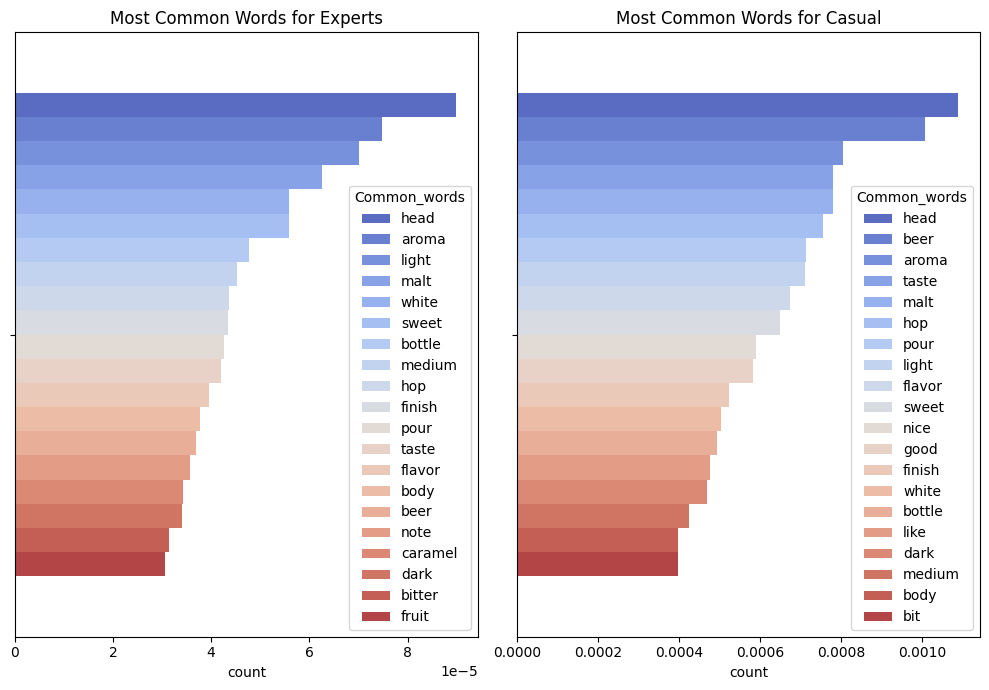

In [17]:
plot_top_words(top_words_expert,top_words_casual)

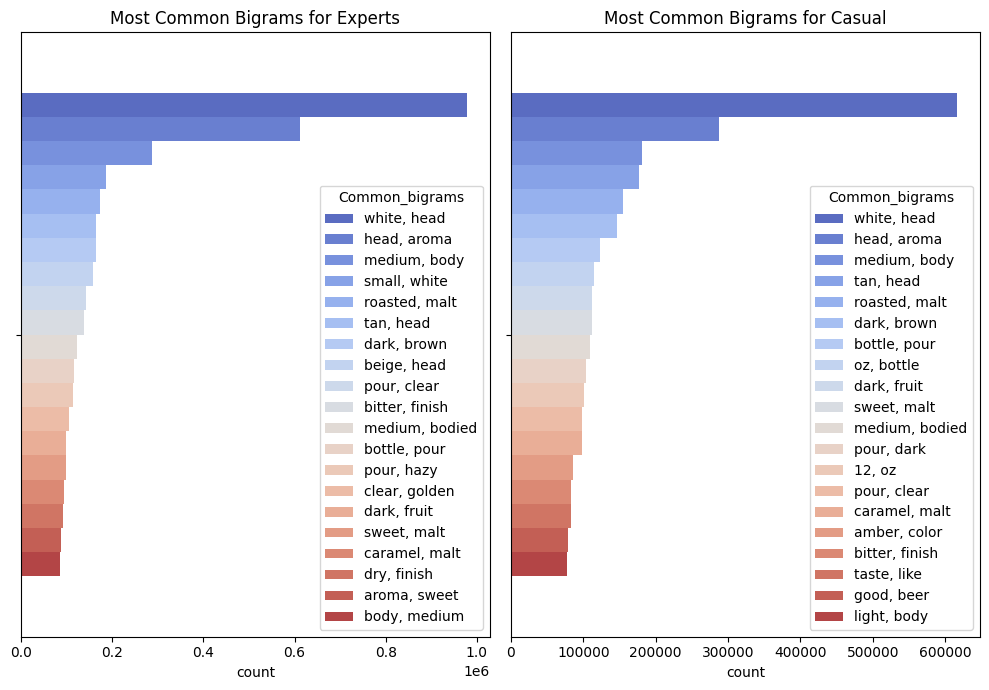

In [18]:
plot_top_bigrams(top_bigrams_expert,top_bigrams_casual)

In [19]:
words_not_in_experts = set(top_words_casual['Common_words']) - set(top_words_expert['Common_words'])

In [20]:
words_not_in_experts

{'bit', 'good', 'like', 'nice'}

In [21]:
words_not_in_others = set(top_words_expert['Common_words']) - set(top_words_casual['Common_words'])

In [22]:
words_not_in_others

{'bitter', 'caramel', 'fruit', 'note'}

### 2.3 Sentiment analysis

In [ ]:
df_texts_casual_sentiment = sentiment(df_casual_text_stats)
df_texts_expert_sentiment = sentiment(df_expert_text_stats)

In [ ]:
df_texts_expert_sentiment[['nb_words','Neg_sentiment','Neu_sentiment','Pos_sentiment','Comp_sentiment']].describe()

,nb_words,Neg_sentiment,Neu_sentiment,Pos_sentiment,Comp_sentiment
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,54.340000,0.048360,0.821430,0.130170,0.413832
std,55.526174,0.059068,0.104111,0.097377,0.489907
min,18.000000,0.000000,0.523000,0.000000,-0.807400
25%,31.000000,0.000000,0.754000,0.061500,0.000000
50%,39.000000,0.034500,0.834000,0.121000,0.577350
75%,54.500000,0.066500,0.881500,0.171250,0.801100
max,415.000000,0.278000,1.000000,0.376000,0.996600


In [ ]:
df_texts_casual_sentiment[['nb_words','Neg_sentiment','Neu_sentiment','Pos_sentiment','Comp_sentiment']].describe()

,nb_words,Neg_sentiment,Neu_sentiment,Pos_sentiment,Comp_sentiment
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,67.760000,0.044940,0.792900,0.162160,0.587336
std,41.015425,0.046099,0.077277,0.078525,0.463569
min,15.000000,0.000000,0.495000,0.000000,-0.758000
25%,36.000000,0.000000,0.749500,0.103750,0.430250
50%,59.000000,0.032500,0.797500,0.161500,0.794800
75%,92.250000,0.073500,0.832000,0.207500,0.933725
max,211.000000,0.237000,1.000000,0.361000,0.986200


### 2.4 Statistical tests

#### 2.4.1 Number of words per review

In [ ]:
#test the number of words in the reviews between experts and non experts
ttest_rel(df_texts_expert_sentiment['nb_words'],df_texts_casual_sentiment['nb_words'])

TtestResult(statistic=-1.9011721341447274, pvalue=0.060187620286987244, df=99)

#### 2.4.2 Sentiment

In [ ]:
#test the compund sentiment between experts and non experts
ttest_rel(df_texts_expert_sentiment['Comp_sentiment'], df_texts_casual_sentiment['Comp_sentiment'])

TtestResult(statistic=-2.528862016417681, pvalue=0.013022740653057661, df=99)

In [ ]:
#test the negative sentiment between experts and non experts
ttest_rel(df_texts_expert_sentiment['Neg_sentiment'], df_texts_casual_sentiment['Neg_sentiment'])

TtestResult(statistic=0.43380350896154835, pvalue=0.6653749996588795, df=99)

In [ ]:
#test the positive sentiment between experts and non experts
ttest_rel(df_texts_expert_sentiment['Pos_sentiment'], df_texts_casual_sentiment['Pos_sentiment'])

TtestResult(statistic=-2.60588437045744, pvalue=0.010577414381607631, df=99)

In [ ]:
#test the neutral sentiment between experts and non experts
ttest_rel(df_texts_expert_sentiment['Neu_sentiment'], df_texts_casual_sentiment['Neu_sentiment'])

TtestResult(statistic=2.2403477916242975, pvalue=0.027303656871817537, df=99)